membangun model clustering berdasarkan dataset yang telah dilakukan praproses data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kuliah/uas/mobileprice_modified.csv')
pd.options.display.max_columns = None

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0,2.2,0,1,0,7.0,0.6,188.0,2,2,20,756,NaN,9,7,19,0,0,1,1
1,1021.0,1,0.5,1,0,1,53.0,0.7,136.0,3,6,905,1988,2631.0,17,3,7,1,1,0,2
2,563.0,1,0.5,1,2,1,41.0,0.9,145.0,5,6,1263,1716,2603.0,11,2,9,1,1,0,2
3,615.0,1,2.5,0,0,0,10.0,0.8,131.0,6,9,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821.0,1,1.2,0,13,1,44.0,0.6,141.0,2,14,1208,1212,1411.0,8,2,15,1,1,0,1


In [ ]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]})
null_count()

,features,dtypes,NaN count,NaN percentage
0,battery_power,float64,0,0.0
1,blue,int64,0,0.0
2,clock_speed,float64,0,0.0
3,dual_sim,int64,0,0.0
4,fc,int64,0,0.0
5,four_g,int64,0,0.0
6,int_memory,float64,0,0.0
7,m_dep,float64,0,0.0
8,mobile_wt,float64,0,0.0
9,n_cores,int64,0,0.0


In [ ]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Nilai unik untuk kolom '{col}': {unique_values}")

Nilai unik untuk kolom 'battery_power': [ 842. 1021.  563. ... 1139. 1467.  858.]
Nilai unik untuk kolom 'blue': [0 1]
Nilai unik untuk kolom 'clock_speed': [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Nilai unik untuk kolom 'dual_sim': [0 1]
Nilai unik untuk kolom 'fc': [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Nilai unik untuk kolom 'four_g': [0 1]
Nilai unik untuk kolom 'int_memory': [ 7. 53. 41. 10. 44. 22. 24.  9. 33. 17. 52. 46. 13. 23. 49. 19. 39. 47.
 38.  8. 57. 51. 21.  5. 60. 61.  6. 11. 50. 34. 20. 27. 42. 40. 64. 14.
 63. 43. 16. 48. 12. 55. 36. 30. 45. 29. 58. 25.  3. 54. 15. 37. 31. 32.
  4. 18.  2. 56. 26. 35. 59. 28. 62. nan]
Nilai unik untuk kolom 'm_dep': [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Nilai unik untuk kolom 'mobile_wt': [188. 136. 145. 131. 141. 164. 139. 187. 174.  93. 182. 177. 159. 198.
 185. 196. 121. 101.  81. 156. 199.  nan 111. 114. 132. 143.  96. 200.
  88. 150. 107.

In [ ]:
imputer = SimpleImputer(strategy='mean')
df[['battery_power', 'int_memory', 'mobile_wt', 'ram']] = imputer.fit_transform(df[['battery_power', 'int_memory', 'mobile_wt', 'ram']])

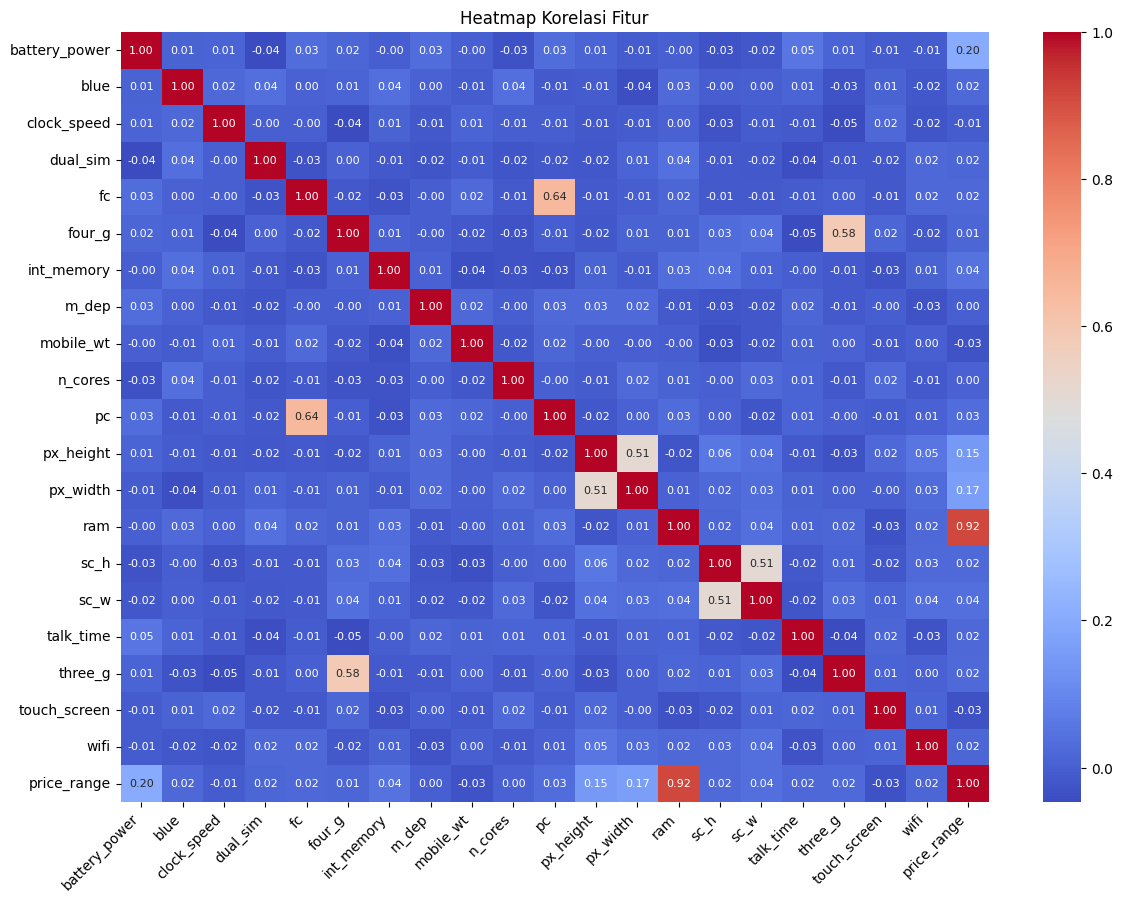

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8}, fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("Data setelah Reduksi Dimensi dengan PCA")
# plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

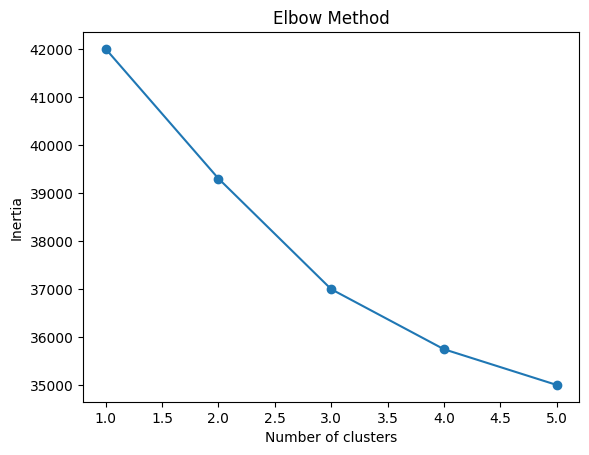

In [ ]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.08064993886823911


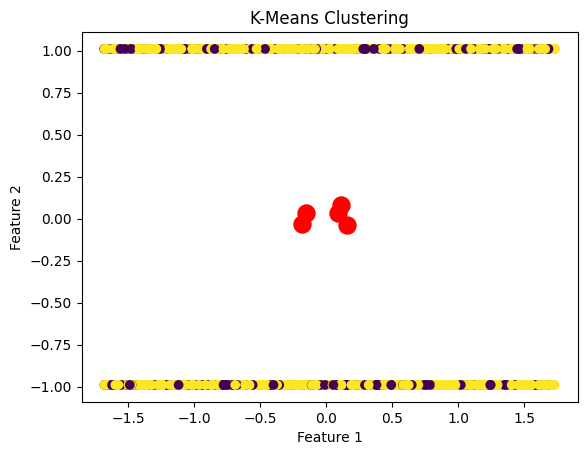

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()